# Telco Customer Churn

### Kelompok 6
- Lintang Wisesa Atissalam (2206119256)
- Putu Raditya Astika Putra (2206020015)

<hr>

#### 1. Import packages

In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

<hr>

#### 2. Data Exploration

In [606]:
telco = pd.read_csv("Telco-Customer-Churn.csv")
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [607]:
# dataframe general info
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [608]:
# dataframe general info function
def report(df):
    col, d_type, uniques, n_uniques, is_null = [], [], [], [], []

    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique())
        n_uniques.append(df[i].nunique())
        is_null.append(df[i].isnull().sum())

    return pd.DataFrame(
        {'Column': col, 'Type': d_type, 'Unique': uniques, 'n Unique': n_uniques, 'Null': is_null}
    )

report(telco)

,Column,Type,Unique,n Unique,Null
0,customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043,0
1,gender,object,"[Female, Male]",2,0
2,SeniorCitizen,int64,"[0, 1]",2,0
3,Partner,object,"[Yes, No]",2,0
4,Dependents,object,"[No, Yes]",2,0
5,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73,0
6,PhoneService,object,"[No, Yes]",2,0
7,MultipleLines,object,"[No phone service, No, Yes]",3,0
8,InternetService,object,"[DSL, Fiber optic, No]",3,0
9,OnlineSecurity,object,"[No, Yes, No internet service]",3,0


In [609]:
# Replace duplicate values in dataframe
telco = telco.replace(['No internet service', 'No phone service'], 'No')
report(telco)

,Column,Type,Unique,n Unique,Null
0,customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043,0
1,gender,object,"[Female, Male]",2,0
2,SeniorCitizen,int64,"[0, 1]",2,0
3,Partner,object,"[Yes, No]",2,0
4,Dependents,object,"[No, Yes]",2,0
5,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73,0
6,PhoneService,object,"[No, Yes]",2,0
7,MultipleLines,object,"[No, Yes]",2,0
8,InternetService,object,"[DSL, Fiber optic, No]",3,0
9,OnlineSecurity,object,"[No, Yes]",2,0


In [610]:
# terdapat empty data pada TotalCharges, yakni 11 data berisi (' ') empty string
# telco['TotalCharges'].iloc[5218]
# telco['TotalCharges'].eq(' ').sum()
# nilai perkiraan TotalCharges = tenure * MonthlyCharges

# 1. replace (' ') to nan
telco['TotalCharges'].replace({' ': np.nan}, inplace=True)
telco['TotalCharges'].isnull().sum()

# 2. telco type = object, convert to float
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'])

# 3. replace null => TotalCharges = tenure * MonthlyCharges
telco['TotalCharges'] = telco.apply(
    lambda row: row.tenure * row.MonthlyCharges if np.isnan(row.TotalCharges) else row.TotalCharges,
    axis=1
)
telco['TotalCharges'].iloc[5218]

0.0

<hr>

#### 3. Data Visualization

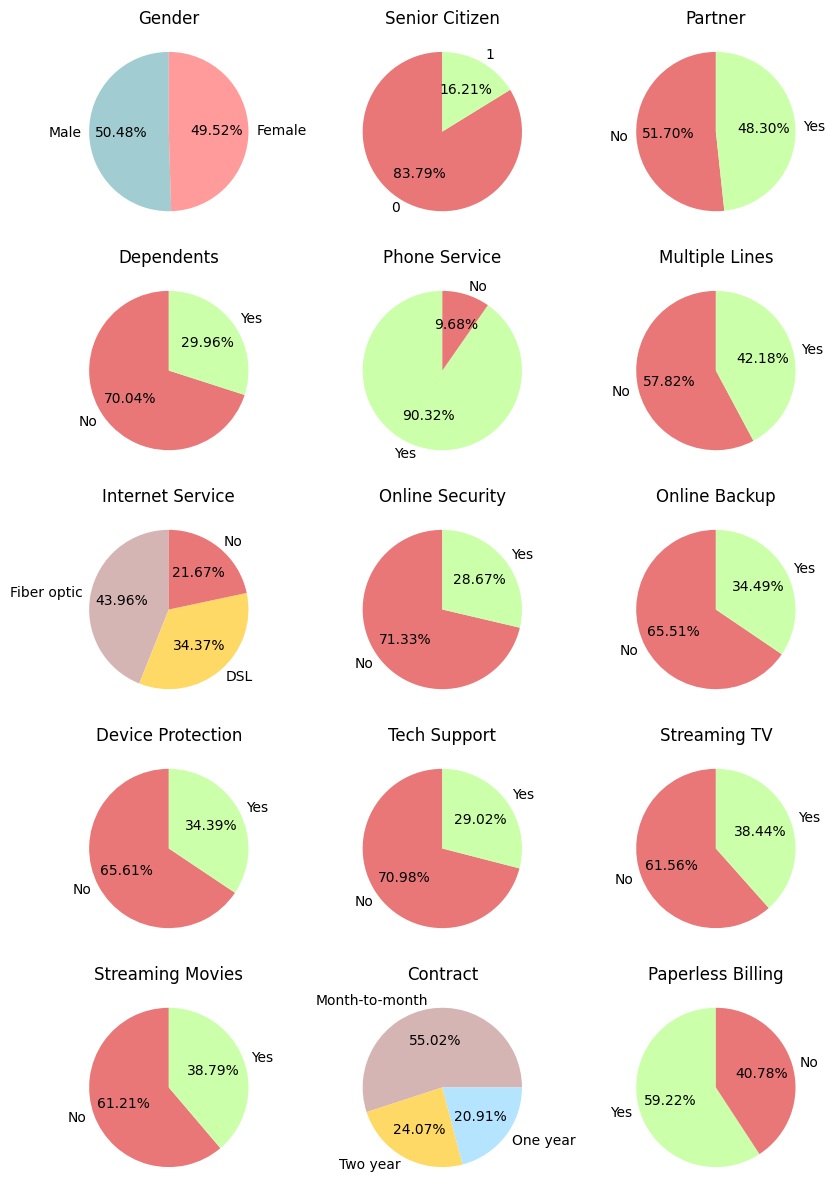

In [611]:
# Persentase tiap feature

fig, (
    (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)
) = plt.subplots(5, 3, figsize=(10, 15))

ax1.set_title("Gender")
ax1.pie(telco['gender'].value_counts(), labels=telco['gender'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#A1CCD1', '#FF9B9B'])
ax2.set_title("Senior Citizen")
ax2.pie(telco['SeniorCitizen'].value_counts(), labels=telco['SeniorCitizen'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])
ax3.set_title("Partner")
ax3.pie(telco['Partner'].value_counts(), labels=telco['Partner'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])

ax4.set_title("Dependents")
ax4.pie(telco['Dependents'].value_counts(), labels=telco['Dependents'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])
ax5.set_title("Phone Service")
ax5.pie(telco['PhoneService'].value_counts(), labels=telco['PhoneService'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#CBFFA9', '#E97777'])
ax6.set_title("Multiple Lines")
ax6.pie(telco['MultipleLines'].value_counts(), labels=telco['MultipleLines'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])

ax7.set_title("Internet Service")
ax7.pie(telco['InternetService'].value_counts(), labels=telco['InternetService'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#D5B4B4', '#FFD966', '#E97777'])
ax8.set_title("Online Security")
ax8.pie(telco['OnlineSecurity'].value_counts(), labels=telco['OnlineSecurity'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])
ax9.set_title("Online Backup")
ax9.pie(telco['OnlineBackup'].value_counts(), labels=telco['OnlineBackup'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])

ax10.set_title("Device Protection")
ax10.pie(telco['DeviceProtection'].value_counts(), labels=telco['DeviceProtection'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])
ax11.set_title("Tech Support")
ax11.pie(telco['TechSupport'].value_counts(), labels=telco['TechSupport'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])
ax12.set_title("Streaming TV")
ax12.pie(telco['StreamingTV'].value_counts(), labels=telco['StreamingTV'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])

ax13.set_title("Streaming Movies")
ax13.pie(telco['StreamingMovies'].value_counts(), labels=telco['StreamingMovies'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777', '#CBFFA9'])
ax14.set_title("Contract")
ax14.pie(telco['Contract'].value_counts(), labels=telco['Contract'].value_counts().index, autopct='%.2f%%', startangle=0, colors=['#D5B4B4', '#FFD966', '#B4E4FF'])
ax15.set_title("Paperless Billing")
ax15.pie(telco['PaperlessBilling'].value_counts(), labels=telco['PaperlessBilling'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#CBFFA9', '#E97777'])

plt.show()

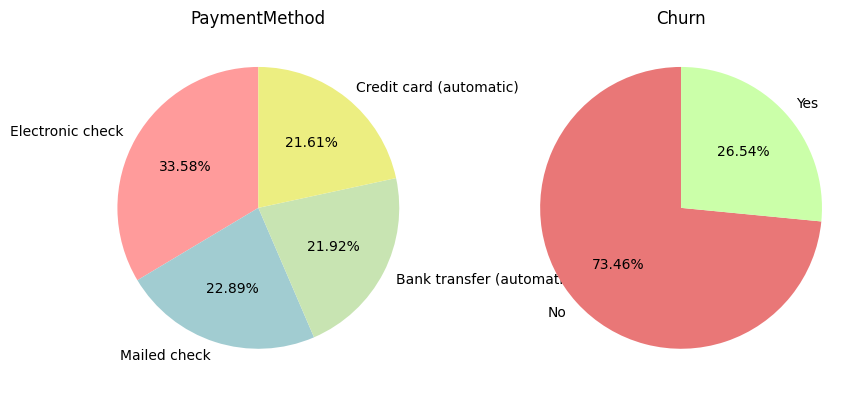

In [612]:
# Persentase tiap feature

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))
ax1.set_title("PaymentMethod")
ax1.pie(telco['PaymentMethod'].value_counts(), labels=telco['PaymentMethod'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#FF9B9B', '#A1CCD1', '#C8E4B2', '#ECEE81'])
ax2.set_title("Churn")
ax2.pie(telco['Churn'].value_counts(), labels=telco['Churn'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777','#CBFFA9'])
plt.show()

In [613]:
print('Churn Yes : ', telco['Churn'].value_counts()['Yes'])
print('Churn No : ', telco['Churn'].value_counts()['No'])

Churn Yes :  1869
Churn No :  5174


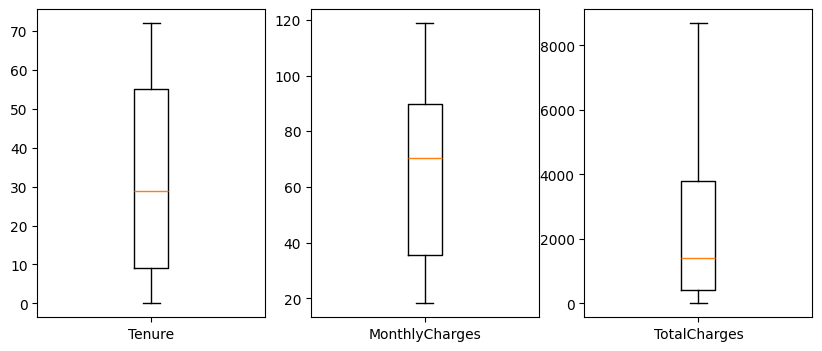

In [614]:
# Distribusi data feature Tenure, Monthly Charges & Total Charges dengan boxplot

fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(10, 4))
ax1.boxplot(telco['tenure'])
ax1.set_xticks([1], ['Tenure'])
ax2.boxplot(telco['MonthlyCharges'])
ax2.set_xticks([1], ['MonthlyCharges'])
ax3.boxplot(telco['TotalCharges'])
ax3.set_xticks([1], ['TotalCharges'])
plt.show()

In [615]:
telco[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


<hr>

#### 4. Data Preprocessing

**4.1 Normalisasi tenure, monthlyCharges, totalCharges**

Normalisasi $\displaystyle x' = \frac {x - x_{min}} {x_{max} - x_{min}}$ 

Data ternormalisasi memiliki nilai antara 0 & 1

In [616]:
# functions normalisasi series/feature/columns
# series = pd.Series(np.array([1,2,3,4], name="X"))

def normalize(series):
    return (series - series.min())/(series.max() - series.min())

In [617]:
telco['tenure'] = normalize(telco['tenure'])
telco['MonthlyCharges'] = normalize(telco['MonthlyCharges'])
telco['TotalCharges'] = normalize(telco['TotalCharges'])
report(telco)

,Column,Type,Unique,n Unique,Null
0,customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043,0
1,gender,object,"[Female, Male]",2,0
2,SeniorCitizen,int64,"[0, 1]",2,0
3,Partner,object,"[Yes, No]",2,0
4,Dependents,object,"[No, Yes]",2,0
5,tenure,float64,"[0.013888888888888888, 0.4722222222222222, 0.0...",73,0
6,PhoneService,object,"[No, Yes]",2,0
7,MultipleLines,object,"[No, Yes]",2,0
8,InternetService,object,"[DSL, Fiber optic, No]",3,0
9,OnlineSecurity,object,"[No, Yes]",2,0


<hr>

**4.2 Labeling (label encoder)**

Label encoder pada binary features
- Female || No = **0**
- Male || Yes = **1**

In [618]:
# Labeling (label encoder)
# female & no = 0  |  male & yes = 1

telco = telco.replace(['No', 'Female'], 0)
telco = telco.replace(['Yes', 'Male'], 1)

# value 'No' pada internetservice biarkan tetap 'No', untuk one hot encoding nanti 
telco.replace(
    {'InternetService': 0},
    {'InternetService': 'No'},
    inplace=True
)
report(telco)

,Column,Type,Unique,n Unique,Null
0,customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043,0
1,gender,int64,"[0, 1]",2,0
2,SeniorCitizen,int64,"[0, 1]",2,0
3,Partner,int64,"[1, 0]",2,0
4,Dependents,int64,"[0, 1]",2,0
5,tenure,float64,"[0.013888888888888888, 0.4722222222222222, 0.0...",73,0
6,PhoneService,int64,"[0, 1]",2,0
7,MultipleLines,int64,"[0, 1]",2,0
8,InternetService,object,"[DSL, Fiber optic, No]",3,0
9,OnlineSecurity,int64,"[0, 1]",2,0


<hr>

**4.3 Handle Imbalanced Dataset**

- Oversampling/Upsampling is suitable when you don’t have a lots of observations in your dataset (<10K observations).
- Undersampling/Downsampling is suitable when you don’t have a lots of observations in your dataset (>10K observations).

In [619]:
print('Churn Yes : ', telco['Churn'].value_counts()[1])
print('Churn No : ', telco['Churn'].value_counts()[0])

Churn Yes :  1869
Churn No :  5174


In [620]:
telco_minor = telco[telco['Churn'] == 1]
telco_major = telco[telco['Churn'] == 0]

# Upsample minority class
telco_minor_upsampled = resample(
    telco_minor, 
    replace=True,
    n_samples=len(telco_major),
    random_state=1234
)

# Combine minor & major as a dataframe
telco_upsampled = pd.concat([telco_major, telco_minor_upsampled])
print('Churn Yes : ', telco_upsampled['Churn'].value_counts()[1])
print('Churn No : ', telco_upsampled['Churn'].value_counts()[0])

Churn Yes :  5174
Churn No :  5174


<hr>

**4.4 Feature Separation**

In [621]:
# Separate feature predictors (x) & target (y)

x = telco_upsampled.drop(['customerID', 'Churn'], axis=1)
print(x.columns)
print(x.iloc[0])

y = telco_upsampled['Churn']
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')
gender                             0
SeniorCitizen                      0
Partner                            1
Dependents                         0
tenure                      0.013889
PhoneService                       0
MultipleLines                      0
InternetService                  DSL
OnlineSecurity                     0
OnlineBackup                       1
DeviceProtection                   0
TechSupport                        0
StreamingTV                        0
StreamingMovies                    0
Contract              Month-to-month
PaperlessBilling                   1
PaymentMethod       Electronic check
MonthlyCharge

<hr>

**4.5 One Hot Encoder**

In [622]:
coltrans = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [7, 14, 16])], 
    remainder='passthrough'
)

x = np.array(coltrans.fit_transform(x), dtype=np.float64)

In [623]:
x[0].tolist()
# 10 elemen pertama = hasil one hot encoding
# 3 elemen pertama = internet service (3 opsi value)
# 3 elemen kedua = contract (3 opsi value)
# 4 elemen selanjutnya = payment method (4 opsi value)

[1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.013888888888888888,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.11542288557213931,
 0.0034370394252026533]

**Features after One Hot Encoding:**

- ~~InternetService~~ => **DSL, Fiber Optic, No**
- ~~Contract~~ => **Month-to-Month, One Year, Two Years**
- ~~PaymentMethod~~ => **Bank Transfer, Credit Card, Electronic Check, Mailed Check** 
- gender
- SeniorCitizen 
- Partner
- Dependents 
- tenure
- PhoneService 
- MultipleLines
- OnlineSecurity 
- OnlineBackup
- DeviceProtection 
- TechSupport 
- StreamingTV
- StreamingMovies
- PaperlessBilling
- MonthlyChas
- TotalChargesges'

<hr>

**4.6 Correlation (Pearson)**

In [624]:
# Pearson Correlation
# combine x after one hot + y as a new dataframe!
df = pd.DataFrame(x, columns = [
    'I.DSL', 'I.Fiber Optic', 'I.No', 'C.M-M', 'C.1Y', 'C.2Y', 'P.Bank', 'P.CC', 'P.EL', 'P.Mail',
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines',
    'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movie',
    'Paperless Billing', 'Monthly Charges', 'Total Charges'
])
df = df.join(y)
df.corr()

,I.DSL,I.Fiber Optic,I.No,C.M-M,C.1Y,C.2Y,P.Bank,P.CC,P.EL,P.Mail,...,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movie,Paperless Billing,Monthly Charges,Total Charges,Churn
I.DSL,1.000000,-0.687502,-0.317917,-0.089666,0.070174,0.041173,0.011683,0.069025,-0.137638,0.086109,...,0.290338,0.112423,0.109940,0.285051,-0.039278,-0.025136,-0.085785,-0.255208,-0.086409,-0.020232
I.Fiber Optic,-0.687502,1.000000,-0.469939,0.256829,-0.091023,-0.227595,-0.028022,-0.063434,0.346748,-0.324375,...,-0.060062,0.146128,0.151203,-0.054341,0.327804,0.320491,0.334262,0.803429,0.319770,0.017881
I.No,-0.317917,-0.469939,1.000000,-0.226330,0.033542,0.247106,0.022385,-0.001082,-0.285418,0.318842,...,-0.274497,-0.327441,-0.331048,-0.275540,-0.380243,-0.387887,-0.332145,-0.738760,-0.312464,0.001646
C.M-M,-0.089666,0.256829,-0.226330,1.000000,-0.619259,-0.622079,-0.191116,-0.201136,0.322395,-0.004499,...,-0.266957,-0.185636,-0.234251,-0.303327,-0.105473,-0.103763,0.180429,0.068703,-0.473658,-0.008929
C.1Y,0.070174,-0.091023,0.033542,-0.619259,1.000000,-0.229538,0.062903,0.091799,-0.120633,-0.005823,...,0.135170,0.115041,0.130253,0.135467,0.079579,0.092354,-0.057971,0.016674,0.239395,0.013838
C.2Y,0.041173,-0.227595,0.247106,-0.622079,-0.229538,1.000000,0.174179,0.157785,-0.279343,0.011383,...,0.196129,0.115396,0.160490,0.240915,0.051389,0.036531,-0.165850,-0.101790,0.348421,-0.002954
P.Bank,0.011683,-0.028022,0.022385,-0.191116,0.062903,0.174179,1.000000,-0.243610,-0.401840,-0.260845,...,0.092113,0.083662,0.067816,0.093195,0.040354,0.033801,-0.032947,0.029188,0.188284,-0.003785
P.CC,0.069025,-0.063434,-0.001082,-0.201136,0.091799,0.157785,-0.243610,1.000000,-0.393316,-0.255312,...,0.134584,0.108150,0.114817,0.136082,0.033797,0.048874,-0.027748,0.027929,0.187367,-0.014567
P.EL,-0.137638,0.346748,-0.285418,0.322395,-0.120633,-0.279343,-0.401840,-0.393316,1.000000,-0.421143,...,-0.129521,-0.022441,-0.011136,-0.132973,0.145205,0.142252,0.223273,0.277054,-0.073557,0.012242
P.Mail,0.086109,-0.324375,0.318842,-0.004499,-0.005823,0.011383,-0.260845,-0.255312,-0.421143,1.000000,...,-0.064750,-0.158547,-0.162982,-0.063135,-0.244475,-0.249063,-0.206945,-0.384846,-0.275582,0.004115


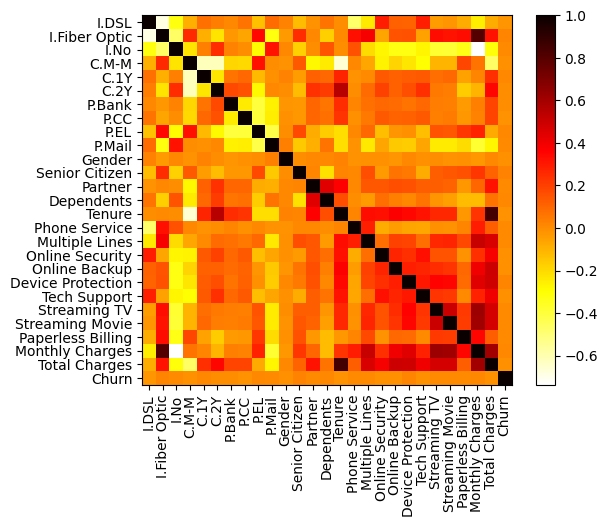

In [625]:
# Correlation in heatmap
plt.imshow(df.corr(), cmap='hot_r')
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns, rotation=90)
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns)
plt.colorbar()
plt.show()

<hr>

#### 5. Classification Models

**5.1 Split Datasets: Test & Training**

Sklearn default: test **25%** & training **75%**

In [626]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(len(x_train))
print(len(x_test))
print(len(x_train) + len(x_test))

7761
2587
10348


<hr>

**5.2 Logistic Regression**

In [627]:
modelA = LogisticRegression(solver='liblinear')
modelA.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [628]:
y_predictA = modelA.predict(x_test)
y_predictA

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [629]:
y_test.to_numpy()

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [630]:
# dataframe x_test, y_test & y_predict
# bandingkan y_test & y_predict

dfA = pd.DataFrame(x_test, columns = [
    'I.DSL', 'I.Fiber Optic', 'I.No', 'C.M-M', 'C.1Y', 'C.2Y', 'P.Bank', 'P.CC', 'P.EL', 'P.Mail',
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines',
    'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movie',
    'Paperless Billing', 'Monthly Charges', 'Total Charges'
])
dfA = dfA.join(pd.Series(y_test.to_numpy(), name="Churn Real"))
dfA = dfA.join(pd.Series(y_predictA, name="Churn Prediction"))
dfA

,I.DSL,I.Fiber Optic,I.No,C.M-M,C.1Y,C.2Y,P.Bank,P.CC,P.EL,P.Mail,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movie,Paperless Billing,Monthly Charges,Total Charges,Churn Real,Churn Prediction
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.821891,0.094366,1,1
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.504975,0.058366,1,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.568657,0.201254,1,1
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.319900,0.175882,1,0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.813930,0.350745,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024876,0.002389,0,0
2583,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.446766,0.094049,0,1
2584,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020896,0.155951,0,0
2585,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.904975,0.907137,0,0


In [631]:
# logistic regression feature importances
importance = modelA.coef_[0]
importance
# highest: tenure (-3.00121486) & total charges (1.63146334)

array([ 0.08809524,  0.84968116, -0.81400028,  0.73868797,  0.09044099,
       -0.70535284, -0.02256085, -0.11751379,  0.31570622, -0.05185546,
        0.02965055,  0.18841802,  0.0074329 , -0.13270016, -3.27048314,
       -0.46402592,  0.21543865, -0.36403926, -0.09064173, -0.03160444,
       -0.2777391 ,  0.17895525,  0.31977305,  0.40025516, -0.34862444,
        1.63329317])

In [632]:
# Confusion Matrix

cmA = confusion_matrix(dfA['Churn Real'], dfA['Churn Prediction'], labels=modelA.classes_)
dfcmA = pd.DataFrame(
    cmA, columns=['Pred NO', 'Pred YES'], index=['Actual NO', 'Actual YES']
)
dfcmA

,Pred NO,Pred YES
Actual NO,938,347
Actual YES,254,1048


<Figure size 1000x300 with 0 Axes>

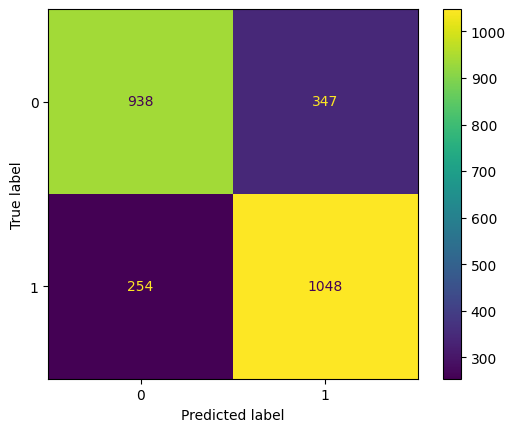

In [633]:
plt.figure(figsize=(10,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cmA, display_labels=modelA.classes_)
disp.plot()
plt.show()

In [634]:
# Evaluation Matrix

print('✅ Accuracy =', accuracy_score(dfA['Churn Real'], dfA['Churn Prediction']))
print('✅ Error Rate =', 1 - accuracy_score(dfA['Churn Real'], dfA['Churn Prediction']))
print('✅ Recall(+) =', recall_score(dfA['Churn Real'], dfA['Churn Prediction'], pos_label=1)) # TP Rate / Recall Positif
print('✅ Recall(-) =', recall_score(dfA['Churn Real'], dfA['Churn Prediction'], pos_label=0))  # TN Rate / Recall Negatif
print('✅ Precision(+) =', precision_score(dfA['Churn Real'], dfA['Churn Prediction'], pos_label=1)) # Precision positif
print('✅ Precision(-) =', precision_score(dfA['Churn Real'], dfA['Churn Prediction'], pos_label=0))  # Precision Negatif
print('✅ F1 Score(+) =', f1_score(dfA['Churn Real'], dfA['Churn Prediction'], pos_label=1))
print('✅ F1 Score(-) =', f1_score(dfA['Churn Real'], dfA['Churn Prediction'], pos_label=0))
print('✅ Balanced Accuracy =', balanced_accuracy_score(dfA['Churn Real'], dfA['Churn Prediction']))

✅ Accuracy = 0.7676845767298028
✅ Error Rate = 0.23231542327019716
✅ Recall(+) = 0.804915514592934
✅ Recall(-) = 0.7299610894941634
✅ Precision(+) = 0.7512544802867384
✅ Precision(-) = 0.7869127516778524
✅ F1 Score(+) = 0.7771598071931776
✅ F1 Score(-) = 0.7573677836092046
✅ Balanced Accuracy = 0.7674383020435487


<hr>

**5.3 Decision Tree**

In [635]:
modelB = tree.DecisionTreeClassifier()
modelB.fit(x_train, y_train)

DecisionTreeClassifier()

In [636]:
y_predictB = modelB.predict(x_test)
y_predictB

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [637]:
y_test.to_numpy()

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [638]:
# dataframe x_test, y_test & y_predict
# bandingkan y_test & y_predict

dfB = pd.DataFrame(x_test, columns = [
    'I.DSL', 'I.Fiber Optic', 'I.No', 'C.M-M', 'C.1Y', 'C.2Y', 'P.Bank', 'P.CC', 'P.EL', 'P.Mail',
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines',
    'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movie',
    'Paperless Billing', 'Monthly Charges', 'Total Charges'
])
dfB = dfB.join(pd.Series(y_test.to_numpy(), name="Churn Real"))
dfB = dfB.join(pd.Series(y_predictB, name="Churn Prediction"))
dfB

,I.DSL,I.Fiber Optic,I.No,C.M-M,C.1Y,C.2Y,P.Bank,P.CC,P.EL,P.Mail,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movie,Paperless Billing,Monthly Charges,Total Charges,Churn Real,Churn Prediction
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.821891,0.094366,1,1
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.504975,0.058366,1,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.568657,0.201254,1,1
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.319900,0.175882,1,1
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.813930,0.350745,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024876,0.002389,0,0
2583,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.446766,0.094049,0,0
2584,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020896,0.155951,0,0
2585,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.904975,0.907137,0,0


In [639]:
# decision tree feature importance
importance = modelB.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# highest: 3 (Contract M-M), 14 (tenure), 24 (monthlycharge), 25 (totalcharge)

Feature: 0, Score: 0.00164
Feature: 1, Score: 0.03448
Feature: 2, Score: 0.00637
Feature: 3, Score: 0.22255
Feature: 4, Score: 0.01306
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.01184
Feature: 7, Score: 0.01207
Feature: 8, Score: 0.01906
Feature: 9, Score: 0.01384
Feature: 10, Score: 0.02402
Feature: 11, Score: 0.01200
Feature: 12, Score: 0.01544
Feature: 13, Score: 0.01286
Feature: 14, Score: 0.12041
Feature: 15, Score: 0.00360
Feature: 16, Score: 0.01325
Feature: 17, Score: 0.01140
Feature: 18, Score: 0.01981
Feature: 19, Score: 0.01039
Feature: 20, Score: 0.02012
Feature: 21, Score: 0.00804
Feature: 22, Score: 0.02366
Feature: 23, Score: 0.01363
Feature: 24, Score: 0.17738
Feature: 25, Score: 0.17907


In [640]:
# Confusion Matrix

cmB = confusion_matrix(dfB['Churn Real'], dfB['Churn Prediction'], labels=modelB.classes_)
dfcmB = pd.DataFrame(
    cmB, columns=['Pred NO', 'Pred YES'], index=['Actual NO', 'Actual YES']
)
dfcmB

,Pred NO,Pred YES
Actual NO,1024,261
Actual YES,74,1228


<Figure size 1000x300 with 0 Axes>

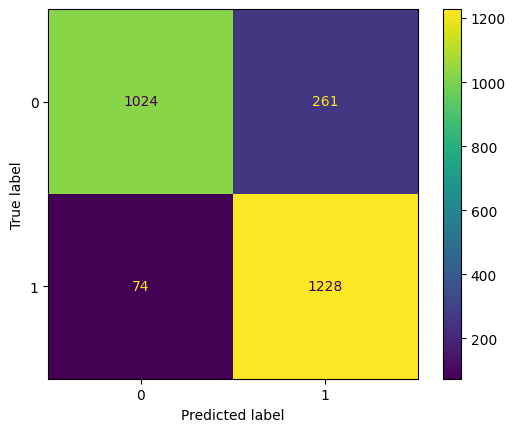

In [641]:
plt.figure(figsize=(10,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cmB, display_labels=modelB.classes_)
disp.plot()
plt.show()

In [642]:
# Evaluation Matrix

print('✅ Accuracy =', accuracy_score(dfB['Churn Real'], dfB['Churn Prediction']))
print('✅ Error Rate =', 1 - accuracy_score(dfB['Churn Real'], dfB['Churn Prediction']))
print('✅ Recall(+) =', recall_score(dfB['Churn Real'], dfB['Churn Prediction'], pos_label=1)) # TP Rate / Recall Positif
print('✅ Recall(-) =', recall_score(dfB['Churn Real'], dfB['Churn Prediction'], pos_label=0))  # TN Rate / Recall Negatif
print('✅ Precision(+) =', precision_score(dfB['Churn Real'], dfB['Churn Prediction'], pos_label=1)) # Precision positif
print('✅ Precision(-) =', precision_score(dfB['Churn Real'], dfB['Churn Prediction'], pos_label=0))  # Precision Negatif
print('✅ F1 Score(+) =', f1_score(dfB['Churn Real'], dfB['Churn Prediction'], pos_label=1))
print('✅ F1 Score(-) =', f1_score(dfB['Churn Real'], dfB['Churn Prediction'], pos_label=0))
print('✅ Balanced Accuracy =', balanced_accuracy_score(dfB['Churn Real'], dfB['Churn Prediction']))

✅ Accuracy = 0.8705063780440665
✅ Error Rate = 0.1294936219559335
✅ Recall(+) = 0.9431643625192012
✅ Recall(-) = 0.796887159533074
✅ Precision(+) = 0.8247145735392881
✅ Precision(-) = 0.9326047358834244
✅ F1 Score(+) = 0.8799713364385525
✅ F1 Score(-) = 0.8594208980276962
✅ Balanced Accuracy = 0.8700257610261376


<hr>

**5.4 K-Nearest Neighbors**

In [643]:
modelC = KNeighborsClassifier()
modelC.fit(x_train, y_train)

KNeighborsClassifier()

In [644]:
y_predictC = modelC.predict(x_test)
y_predictC

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [645]:
y_test.to_numpy()

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [646]:
# dataframe x_test, y_test & y_predict
# bandingkan y_test & y_predict

dfC = pd.DataFrame(x_test, columns = [
    'I.DSL', 'I.Fiber Optic', 'I.No', 'C.M-M', 'C.1Y', 'C.2Y', 'P.Bank', 'P.CC', 'P.EL', 'P.Mail',
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines',
    'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movie',
    'Paperless Billing', 'Monthly Charges', 'Total Charges'
])
dfC = dfC.join(pd.Series(y_test.to_numpy(), name="Churn Real"))
dfC = dfC.join(pd.Series(y_predictC, name="Churn Prediction"))
dfC

,I.DSL,I.Fiber Optic,I.No,C.M-M,C.1Y,C.2Y,P.Bank,P.CC,P.EL,P.Mail,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movie,Paperless Billing,Monthly Charges,Total Charges,Churn Real,Churn Prediction
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.821891,0.094366,1,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.504975,0.058366,1,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.568657,0.201254,1,1
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.319900,0.175882,1,0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.813930,0.350745,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.024876,0.002389,0,0
2583,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.446766,0.094049,0,0
2584,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.020896,0.155951,0,0
2585,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.904975,0.907137,0,0


In [647]:
# Confusion Matrix

cmC = confusion_matrix(dfC['Churn Real'], dfC['Churn Prediction'], labels=modelC.classes_)
dfcmC = pd.DataFrame(
    cmC, columns=['Pred NO', 'Pred YES'], index=['Actual NO', 'Actual YES']
)
dfcmC

,Pred NO,Pred YES
Actual NO,888,397
Actual YES,195,1107


<Figure size 1000x300 with 0 Axes>

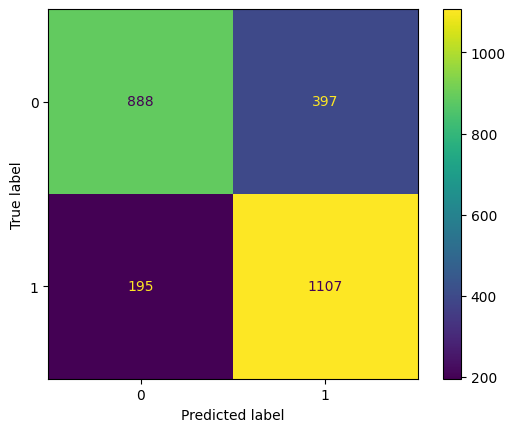

In [648]:
plt.figure(figsize=(10,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cmC, display_labels=modelC.classes_)
disp.plot()
plt.show()

In [649]:
# Evaluation Matrix

print('✅ Accuracy =', accuracy_score(dfC['Churn Real'], dfC['Churn Prediction']))
print('✅ Error Rate =', 1 - accuracy_score(dfC['Churn Real'], dfC['Churn Prediction']))
print('✅ Recall(+) =', recall_score(dfC['Churn Real'], dfC['Churn Prediction'], pos_label=1)) # TP Rate / Recall Positif
print('✅ Recall(-) =', recall_score(dfC['Churn Real'], dfC['Churn Prediction'], pos_label=0))  # TN Rate / Recall Negatif
print('✅ Precision(+) =', precision_score(dfC['Churn Real'], dfC['Churn Prediction'], pos_label=1)) # Precision positif
print('✅ Precision(-) =', precision_score(dfC['Churn Real'], dfC['Churn Prediction'], pos_label=0))  # Precision Negatif
print('✅ F1 Score(+) =', f1_score(dfC['Churn Real'], dfC['Churn Prediction'], pos_label=1))
print('✅ F1 Score(-) =', f1_score(dfC['Churn Real'], dfC['Churn Prediction'], pos_label=0))
print('✅ Balanced Accuracy =', balanced_accuracy_score(dfC['Churn Real'], dfC['Churn Prediction']))

✅ Accuracy = 0.7711635098569772
✅ Error Rate = 0.22883649014302276
✅ Recall(+) = 0.8502304147465438
✅ Recall(-) = 0.6910505836575875
✅ Precision(+) = 0.7360372340425532
✅ Precision(-) = 0.8199445983379502
✅ F1 Score(+) = 0.7890235210263721
✅ F1 Score(-) = 0.7500000000000001
✅ Balanced Accuracy = 0.7706404992020657
